In [7]:
#importing lbrary files
import pandas as pd
import numpy as np 
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv("C:\\Users\\USER\\Desktop\\review-details historic.csv")
data.columns=['category','review_rating','review_text']

data.shape

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(2501, 3)

In [27]:
data.head()

,category,review_rating,review_text
0,Personal Care,5,"As you get older, you know what you like and w..."
1,Foods,5,Three gigantic marmite jars that will last pro...
2,Foods,4,Excellent
3,Foods,5,A great flavour top - up for slow cooking.
4,Homecare,5,Does what is says it does


In [28]:
# data cleaning
def clean_text(txt):
    txt= " ".join([c for c in txt if c not in string.punctuation])
    tokens = re.split('\w+',txt)
    txt=[ps.stem(word) for word in tokens if word not in stopwords]
    return(txt)

In [45]:
#data preprocessing
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatizer=WordNetLemmatizer()
for index, row in data.iterrows():
    filter_sentence =[]
    sentence = data['review_text']
    sentence = re.sub(r'[^\w\s]','',str(sentence))
    words = nltk.word_tokenize(sentence)
    words = [w for w in words if not w in stop_words]
    for word in words:    
        filter_sentence.append(lemmatizer.lemmatize(word))
    print(filter_sentence)
  

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [59]:
#data transforming
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

corpus = data['review_text']
X= cv.fit(corpus)
print(X.vocabulary_)
print(cv.get_feature_names())

X= cv.transform(corpus)
X= cv.fit_transform(corpus)
print(X.shape)
print(X.toarray())

{'as': 255, 'you': 3738, 'get': 1414, 'older': 2256, 'know': 1796, 'what': 3635, 'like': 1869, 'and': 193, 'is': 1740, 'suitable': 3203, 'for': 1332, 'your': 3743, 'body': 420, 'all': 158, 'dove': 1028, 'products': 2515, 'gives': 1427, 'that': 3316, 'fresh': 1360, 'over': 2296, 'wide': 3658, 'awake': 281, 'feeling': 1257, 'no': 2192, 'dandruff': 859, 'or': 2276, 'flakey': 1297, 'skin': 2933, 'smelly': 2964, 'pits': 2408, 'three': 3351, 'gigantic': 1420, 'marmite': 1988, 'jars': 1763, 'will': 3663, 'last': 1811, 'probably': 2505, 'whole': 3656, 'life': 1862, 'else': 1109, 'would': 3708, 'possibly': 2456, 'wish': 3674, 'order': 2278, 'came': 521, 'in': 1679, 'time': 3369, 'when': 3638, 'mentioned': 2029, 'safely': 2763, 'packed': 2316, 'very': 3558, 'happy': 1527, 'with': 3677, 'it': 1747, 'excellent': 1164, 'great': 1479, 'flavour': 1303, 'top': 3406, 'up': 3515, 'slow': 2950, 'cooking': 773, 'does': 1008, 'says': 2794, 'item': 1754, 'good': 1454, 'men': 2026, 'thank': 3312, 'beautiful'

In [61]:
cv1=CountVectorizer(analyzer= clean_text)

X = cv.fit_transform(data['review_text'])
print(X.shape)

(2501, 3752)


In [48]:
print(cv.get_feature_names())

['00', '07', '10', '100', '11', '114', '114g', '12', '15', '150', '15ml', '15p', '16', '166', '18', '19', '1x38', '20', '2018', '201csmart', '216', '228', '24', '25', '26', '2nd', '2wiped', '2x25', '30', '30c', '32', '34', '35', '36', '38', '3in', '3rd', '3yo', '40', '400', '400ml', '40g', '45', '48', '4am', '4x400ml', '50', '500', '50ml', '50p', '540', '540ml', '55', '55washes', '5kg', '5l', '5litre', '5lts', '5p', '5pm', '60', '60deg', '64', '70', '73', '8am', '8hrs', '90', '900', '90g', '90s', '95', '99', '9kg', '9lt', 'aaaaaaaaamazing', 'aaaaamazing', 'able', 'about', 'above', 'abrasions', 'absence', 'absolute', 'absolutelly', 'absolutely', 'absorb', 'absorbed', 'absorbing', 'absorbs', 'absoulutely', 'accepted', 'accepting', 'access', 'accidentally', 'accurate', 'accurately', 'accustomed', 'acne', 'across', 'act', 'acted', 'action', 'actual', 'actually', 'ad', 'add', 'added', 'addicted', 'adding', 'addition', 'additional', 'additions', 'additives', 'address', 'adds', 'adequate', 'a

In [49]:
df =pd.DataFrame(X.toarray(),columns=cv.get_feature_names())
df.head(10)

,00,07,10,100,11,114,114g,12,15,150,...,younger,your,youre,yourself,youth,yuck,yum,yummy,zesty,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [77]:
#most frequent tokens
data['review_text'].unique()

array(['As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!',
       'Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it.',
       'Excellent', ...,
       "Contents of this bottle is lovely. HOWEVER trying to get it out of the squeezy bottle is a challenge of strength and endurance. I will buy Helmann's light mayo again but NEVER in this bottle because I don't want to risk my bones and tendons breaking trying to get the contents out of the bottle.",
       'These taste great and you cannot Cant tell they are vegan',
       "Really pleased to have vegan Cornettos at last, they're very close to the dairy version and I'm not gluten intolerant but the cone is great and you wouldn't know it's gluten free so I'm happy!"]

In [5]:
#bow dictionary
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 
sentence_1="As you get older, you know what you like and what is suitable for your body. I like all Dove products. Gives you that fresh all over, wide awake feeling and no dandruff or flakey skin. No smelly a/pits!"
sentence_2="Three gigantic marmite jars that will last probably a whole life! What else would you possibly wish for? Order came in time, when mentioned, safely packed. Very happy with it."
sentence_3="Excellent" 
sentence_4="Contents of this bottle is lovely. HOWEVER trying to get it out of the squeezy bottle is a challenge of strength and endurance. I will buy Helmann's light mayo again but NEVER in this bottle because I don't want to risk my bones and tendons breaking trying to get the contents out of the bottle." 
sentence_5 ="These taste great and you cannot Cant tell they are vegan"
sentence_6 ="Really pleased to have vegan Cornettos at last, they're very close to the dairy version and I'm not gluten intolerant but the cone is great and you wouldn't know it's gluten free so I'm happy!"
#without smooth IDF
print("Without Smoothing:")
#define tf-idf
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=False,  
                        ngram_range=(1,1),stop_words='english') # to use only  bigrams ngram_range=(2,2)
#transform
tf_idf_data = tf_idf_vec.fit_transform([sentence_1,sentence_2,sentence_3,sentence_4,sentence_5,sentence_6])
 
#create dataframe
tf_idf_dataframe=pd.DataFrame(tf_idf_data.toarray(),columns=tf_idf_vec.get_feature_names())
print(tf_idf_dataframe)
print("\n")
 
#with smooth
tf_idf_vec_smooth = TfidfVectorizer(use_idf=True,  
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')
 
 
tf_idf_data_smooth = tf_idf_vec_smooth.fit_transform([sentence_1,sentence_2,sentence_3,sentence_4,sentence_5,sentence_6])
 
print("With Smoothing:")
tf_idf_dataframe_smooth=pd.DataFrame(tf_idf_data_smooth.toarray(),columns=tf_idf_vec_smooth.get_feature_names())
print(tf_idf_dataframe_smooth)

Without Smoothing:
      awake      body     bones    bottle  breaking       buy      came  \
0  0.226078  0.226078  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.271512   
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3  0.000000  0.000000  0.160128  0.640513  0.160128  0.160128  0.000000   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

   challenge     close      cone  ...      tell   tendons      time    trying  \
0   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.271512  0.000000   
2   0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
3   0.160128  0.000000  0.000000  ...  0.000000  0.160128  0.000000  0.320256   
4   0.000000  0.000000  0.000000  ...  0.565219  0

In [8]:
#model fitting
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
data.isnull().sum()

category         0
review_rating    0
review_text      0
dtype: int64

In [9]:
data.isnull().sum().sort_values(ascending=False)

category         0
review_rating    0
review_text      0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum().sort_values(ascending=False)

category            0
review_rating       0
review_text         0
Positively Rated    0
dtype: int64

In [13]:
data["review_rating"].value_counts()

5    1848
4     319
1     146
3     107
2      81
Name: review_rating, dtype: int64

In [36]:
#remove the rating we want
#data[data["review_rating"] != 4]


In [46]:
data["Positively Rated"] = np.where(data["review_rating"] >3, 1, 0)

In [47]:
data["Positively Rated"].value_counts()

1    2167
0     334
Name: Positively Rated, dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

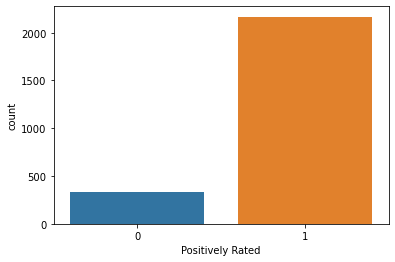

In [48]:
import seaborn as sns
sns.countplot(data["Positively Rated"])

In [25]:
#training-testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data["review_text"], data["Positively Rated"],random_state=50)
print(X_train)

1479    I rate this product 10-10.I have used so many ...
2473                                                   Ok
1825    Its just too sweet to eat: caramel, marshmallo...
1701                                           bit sticky
500                         Good price, good washing pods
                              ...                        
2014    Exactly what you’d expect. I occasionally use ...
2157                                                   Ok
1931    These are not as strong as I expected but they...
1504    This toner feels really nice and soothing on t...
1712                                      Lovely. Big too
Name: review_text, Length: 1875, dtype: object


In [23]:
print(y_train)

1479    1
2473    1
1825    0
1701    0
500     1
       ..
2014    1
2157    1
1931    1
1504    1
1712    1
Name: Positively Rated, Length: 1875, dtype: int32


In [ ]:
X_train[100]

In [27]:
vect = CountVectorizer().fit(X_train)
vect.get_feature_names()[::100]

['00',
 'advantage',
 'applying',
 'bear',
 'bounce',
 'care',
 'closed',
 'controlling',
 'decided',
 'disgusting',
 'efforts',
 'fabrics',
 'foams',
 'glad',
 'hasnt',
 'i2019ve',
 'its',
 'lifted',
 'manage',
 'moisturised',
 'no',
 'outstanding',
 'piece',
 'promptly',
 'red',
 'round',
 'serums',
 'smelly',
 'spot',
 'subscription',
 'terms',
 'touch',
 'useful',
 'were',
 'younger']

In [28]:
len(vect.get_feature_names())

3409

In [30]:
X_train_vectorized = vect.transform(X_train)
X_train_vectorized
print(X_train_vectorized)

  (0, 2)	2
  (0, 69)	1
  (0, 73)	1
  (0, 117)	1
  (0, 151)	1
  (0, 168)	4
  (0, 181)	1
  (0, 209)	2
  (0, 226)	2
  (0, 235)	1
  (0, 259)	1
  (0, 296)	3
  (0, 466)	1
  (0, 589)	1
  (0, 611)	1
  (0, 919)	2
  (0, 1047)	1
  (0, 1053)	1
  (0, 1122)	1
  (0, 1135)	1
  (0, 1140)	1
  (0, 1151)	1
  (0, 1244)	1
  (0, 1246)	1
  (0, 1319)	1
  :	:
  (1873, 1989)	1
  (1873, 2047)	1
  (1873, 2064)	2
  (1873, 2138)	1
  (1873, 2295)	1
  (1873, 2299)	1
  (1873, 2327)	1
  (1873, 2372)	1
  (1873, 2392)	1
  (1873, 2410)	1
  (1873, 2470)	1
  (1873, 2671)	1
  (1873, 2727)	1
  (1873, 2760)	1
  (1873, 3016)	3
  (1873, 3022)	1
  (1873, 3041)	2
  (1873, 3074)	1
  (1873, 3085)	1
  (1873, 3198)	1
  (1873, 3262)	1
  (1873, 3373)	1
  (1874, 342)	1
  (1874, 1761)	1
  (1874, 3092)	1


In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized,y_train)

LogisticRegression()

In [35]:
predictions = model.predict(vect.transform(X_test))
print(predictions)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 

In [39]:
feature_names = np.array(vect.get_feature_names()) 
sorted_coef_index = model.coef_[0].argsort()

In [41]:
print("Smalls Coeff",feature_names[sorted_coef_index[:10]])

Smalls Coeff ['cost' 'were' 'horrible' 'however' 'was' 'sticky' 'taste' 'disappointed'
 'cans' 'doesn']


In [42]:
print("Largest Coeff",feature_names[sorted_coef_index[:-11:-1]])

Largest Coeff ['great' 'value' 'love' 'really' 'scent' 'fresh' 'soft' 'ice' 'more'
 'best']


In [49]:
#model accuracy
from sklearn.metrics import roc_auc_score
print("AUC:",roc_auc_score(y_test,predictions))


AUC: 0.8323161355948242
